In [11]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline


In [31]:
df = pd.read_csv('Duescht_Table1_Rewrite.csv')
df.sort_values('Crater_Name', inplace=True)
df.reset_index(inplace=True)


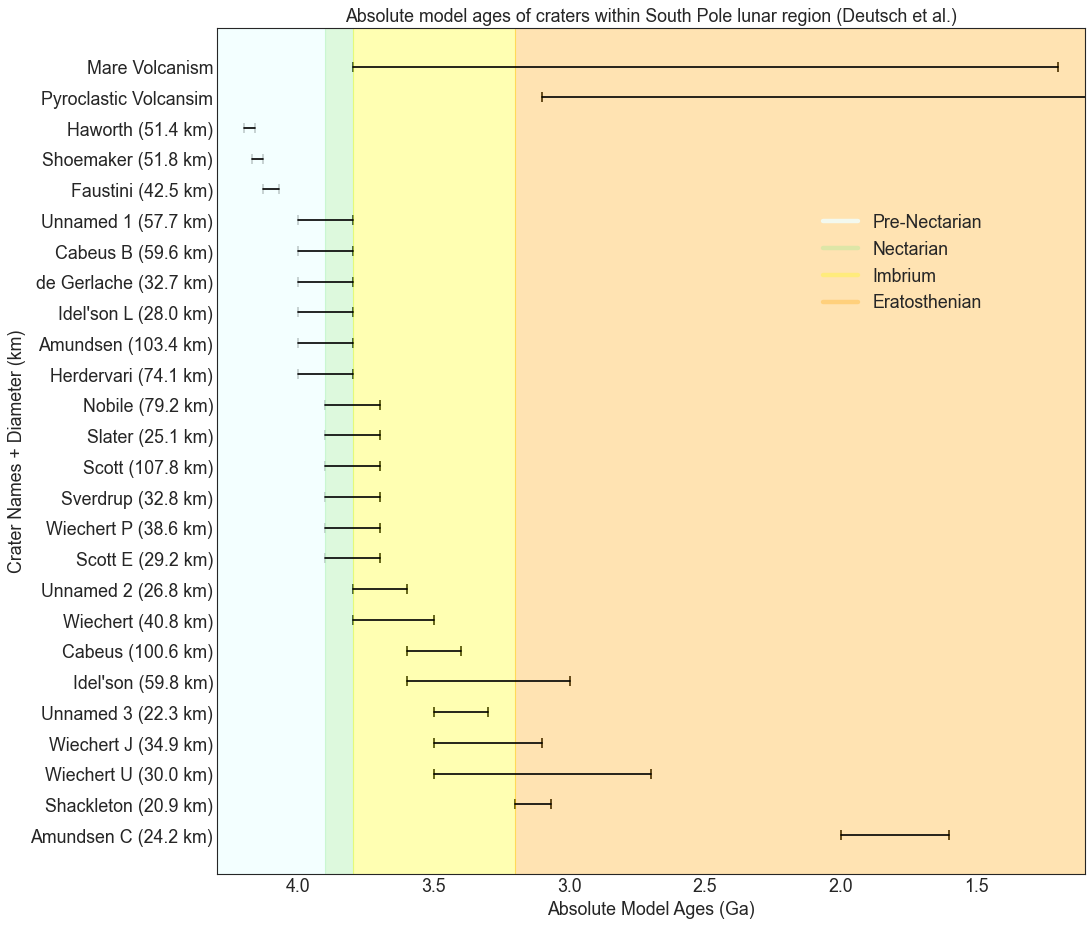

In [30]:
#Function to draw line segment
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='black')
    ax.add_line(l)
    return(l)


#Figure and Axes
fig, ax = plt.subplots(1,1,figsize=(14,14), dpi=80)

#Add Data Points + Plot Setup
ax.scatter(y=df['index'], x=df['Min_Age'], s=80, color='black', marker='|')
ax.scatter(y=df['index'], x=df['Max_Age'], s=80, color='black', marker='|')




ax.invert_xaxis()
ax.invert_yaxis()
ax.set_yticks(df['index'])
ax.set_yticklabels(df['Crater_Name'])
ax.set(ylabel='Crater Names + Diameter (km)', xlabel='Absolute Model Ages (Ga)')
ax.set_title('Absolute model ages of craters within South Pole lunar region (Deutsch et al.)')
ax.set(xlim=(4.3, 1.1))


#Adds Chronological Periods
ax.axvspan(4.3, 3.9, alpha=0.8, color='azure')
ax.axvspan(3.9,3.8, alpha=0.3, color='lightgreen')
ax.axvspan(3.8, 3.2, alpha=0.3, color='yellow')
ax.axvspan(3.2, 1.1, alpha=0.3, color='orange')

#Creates Legend
legend_elements = [Line2D([0], [0], color='azure', alpha=0.8, lw=4, label='Pre-Nectarian'),
                   Line2D([0], [0], color='lightgreen', alpha=0.3, lw=4, label='Nectarian'), Line2D([0], [0], color='yellow', alpha=0.3, lw=4, label='Imbrium'), Line2D([0], [0], alpha=0.3, color='orange', lw=4, label='Eratosthenian')]
ax.legend(handles=legend_elements, loc='best', bbox_to_anchor=(0.9, 0.8), edgecolor='black', facecolor='white')

#Line Segments
for i, p1, p2 in zip(df['index'], df['Min_Age'], df['Max_Age']):
    newline([p1,i], [p2,i])

plt.savefig('Absolute_Model_Ages_Deutsch.png', bbox_inches='tight')